<div>
Olá, Thaynnan!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Teste A/B do Projeto final

Autor: Thaynnan Aurick

Data: 29/04/2025

# Bibliotecas.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from IPython.display import display

# Carrendo dados.

In [90]:
project_marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants =pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Aqui você precisa carregar os dados a partir do servidor do curso, caso contrário eu não conseguirei executar o seu código.
</div>

# Verificando dados.

In [91]:
project_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


A coluna "start_dt" e "finish_dt" se encontram no tipo "object" quando deveriam ser "datetime"

In [92]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


A coluna "event_dt" se encontra no tipo "object" quando deveriam ser "datetime" e tambem foram encontrados alguns valores nulos na coluna de "details".

In [93]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


A coluna "first_date" se encontra no tipo "object" quando deveriam ser "datetime"

In [94]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


A coluna "first_date" se encontra no tipo "object" quando deveriam ser "datetime"

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `head()` foi utilizado para exibir uma amostra inicial dos seus dados
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- Todos os conjuntos de dados foram explorados
- Aqui você poderia também fazer um estudo de valores nulos/ausentes.

</div>

# Explorando dados.

In [95]:
project_marketing['start_dt'] = pd.to_datetime(project_marketing['start_dt'], errors='coerce')
project_marketing['finish_dt'] = pd.to_datetime(project_marketing['finish_dt'], errors='coerce')
project_marketing.info()# Sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [96]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [97]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'], errors='coerce')
new_users.info()# Sanity Check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [98]:
events['event_dt'] = pd.to_datetime(events['event_dt'], errors='coerce')
events.info()# Sanity Check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [99]:
linhas_com_nulos = events[events['details'].isnull()]
linhas_com_nulos.head()

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN


In [100]:
purchase_events = events[events['event_name'] == 'purchase'].copy()

In [101]:
# Apagando a coluna "details" ja que a mesma tem muitos valores ausentes.
events.drop(columns=['details'], inplace=True)

In [102]:
new_users.head()# Sanity Check

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


* Estude a conversão em diferentes etapas do funil.

In [103]:
events = pd.DataFrame(events)

# Contagem de usuários únicos em cada etapa
total_visitors = events['user_id'].nunique()  # Total de visitantes

# Contagem de usuários em cada etapa
login_users = events[events['event_name'] == 'login']['user_id'].nunique()
product_page_users = events[events['event_name'] == 'product_page']['user_id'].nunique()
product_cart_users = events[events['event_name'] == 'product_cart']['user_id'].nunique()
purchase_users = events[events['event_name'] == 'purchase']['user_id'].nunique()

# Criar listas para as etapas e valores
etapas_funil = ['Visitantes', 'Login', 'Página do Produto', 'Carrinho', 'Compra']
valores_funil = [total_visitors, login_users, product_page_users, product_cart_users, purchase_users]

# Criar o gráfico de funil com sintaxe correta
fig = go.Figure(go.Funnel(
    y=etapas_funil,
    x=valores_funil,
    textinfo='value+percent initial',
    opacity=0.8,
    marker={
        "color": ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f'],
        "line": {"width": [1, 1, 1, 1, 1], "color": ['white']}
    },
    textfont={"family": "Arial", "size": 14, "color": "white"},
    connector={"line": {"color": "royalblue", "dash": "dot", "width": 2}}
))

# Configurações do layout
fig.update_layout(
    title={
        'text': 'Análise de Funil de Conversão',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    width=900,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100),
    plot_bgcolor='white',
    showlegend=False
)

# Adicionar anotações de taxa de conversão
for i in range(1, len(valores_funil)):
    conversion_rate = (valores_funil[i]/valores_funil[i-1])*100
    fig.add_annotation(
        x=valores_funil[i-1]/2,
        y=i-0.5,
        text=f'{conversion_rate:.1f}%',
        showarrow=False,
        font=dict(size=12)
    )

fig.show()

In [104]:
# Criar sequências de eventos por usuário
user_paths = events.groupby('user_id')['event_name'].apply(list).reset_index()

# Contar caminhos completos
caminhos = {
    'Login → Página → Carrinho → Compra': 0,
    'Login → Página → Carrinho': 0,
    'Login → Página': 0,
    'Apenas Login': 0
}

for path in user_paths['event_name']:
    if 'login' in path and 'product_page' in path and 'product_cart' in path and 'purchase' in path:
        caminhos['Login → Página → Carrinho → Compra'] += 1
    elif 'login' in path and 'product_page' in path and 'product_cart' in path:
        caminhos['Login → Página → Carrinho'] += 1
    elif 'login' in path and 'product_page' in path:
        caminhos['Login → Página'] += 1
    elif 'login' in path:
        caminhos['Apenas Login'] += 1

# Converter para DataFrame e calcular métricas
df_caminhos = pd.DataFrame.from_dict(caminhos, orient='index', columns=['Contagem'])
df_caminhos['Percentual'] = (df_caminhos['Contagem'] / len(user_paths)) * 100
df_caminhos['Taxa de Retenção'] = (df_caminhos['Contagem'] / df_caminhos['Contagem'].max()) * 100

# Ordenar do maior para menor perda (menor retenção)
df_caminhos = df_caminhos.sort_values('Taxa de Retenção', ascending=True)

# Adicionar coluna de classificação
df_caminhos['Classificação'] = ['Maior perda', 'Alta perda', 'Média perda', 'Menor perda']

# Formatar saída
df_caminhos['Percentual'] = df_caminhos['Percentual'].apply(lambda x: f"{x:.1f}%")
df_caminhos['Taxa de Retenção'] = df_caminhos['Taxa de Retenção'].apply(lambda x: f"{x:.1f}%")

# Estilo para melhor visualização
def color_perda(val):
    if 'Maior' in val:
        return 'color: red; font-weight: bold'
    elif 'Menor' in val:
        return 'color: green; font-weight: bold'
    else:
        return ''

styled_df = df_caminhos.style.applymap(color_perda, subset=['Classificação'])
styled_df.set_caption('Análise de Perdas nos Caminhos do Funil')

# Mostrar resultados
print("\nRESULTADO DA ANÁLISE DE PERDAS NOS CAMINHOS:")
display(styled_df)

# Análise adicional
print("\nPRINCIPAIS CONCLUSÕES:")
print(f"1. Caminho com MAIOR PERDA: {df_caminhos.index[0]} ({df_caminhos.iloc[0]['Percentual']} dos usuários)")
print(f"2. Caminho com MENOR PERDA: {df_caminhos.index[-1]} ({df_caminhos.iloc[-1]['Percentual']} dos usuários)")
print(f"\n3. Taxa de conversão completa (Login→Compra): {df_caminhos.loc['Login → Página → Carrinho → Compra', 'Percentual']}")


RESULTADO DA ANÁLISE DE PERDAS NOS CAMINHOS:


,Contagem,Percentual,Taxa de Retenção,Classificação
Login → Página → Carrinho → Compra,4248,7.2%,16.2%,Maior perda
Login → Página → Carrinho,8458,14.4%,32.3%,Alta perda
Apenas Login,19767,33.7%,75.4%,Média perda
Login → Página,26223,44.7%,100.0%,Menor perda



PRINCIPAIS CONCLUSÕES:
1. Caminho com MAIOR PERDA: Login → Página → Carrinho → Compra (7.2% dos usuários)
2. Caminho com MENOR PERDA: Login → Página (44.7% dos usuários)

3. Taxa de conversão completa (Login→Compra): 7.2%


* O número de eventos por usuário é distribuído igualmente entre as amostras?

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui você precisa responder às seguintes perguntas:
    
- *Qual a etapa do funil em que há maior perda de usuários? Dica: verifique as diferenças percentuais entre as etapas do funil*
- *Qual é o caminho do funil que é mais percorrido pelos usuários? Dica: verifique a quantidade de usuários que percorre cada caminho e divida pelo total de usuários*
</s>
</div>

* Os usuários de ambas as amostras estão presentes?

In [105]:
# Contando o número de usuários em cada grupo
user_counts = participants['group'].value_counts()

# Criando uma tabela de contingência
contingency_table = pd.DataFrame({
    'Grupo': user_counts.index,
    'Número de Usuários': user_counts.values
})

# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table[['Número de Usuários']])

# Exibindo os resultados
print("Tabela de Contingência:")
print(contingency_table)
print(f"\nValor do teste qui-quadrado: {chi2}")
print(f"Valor p: {p}")

# Interpretando o resultado
alpha = 0.05
if p < alpha:
    print("Rejeitamos a hipótese nula: a distribuição de eventos por usuário não é igual entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula: a distribuição de eventos por usuário é igual entre os grupos.")

Tabela de Contingência:
  Grupo  Número de Usuários
0     A                8214
1     B                6311

Valor do teste qui-quadrado: 0.0
Valor p: 1.0
Não rejeitamos a hipótese nula: a distribuição de eventos por usuário é igual entre os grupos.


In [106]:
# Primeiro, vamos ver se há usuários duplicados na tabela de participantes
duplicados = participants[participants.duplicated(subset=['user_id', 'ab_test'], keep=False)]

# verificando especificamente se há usuários em grupos diferentes
usuarios_em_multiplos_grupos = participants.groupby(['user_id', 'ab_test']).agg({'group': 'nunique'})
usuarios_problematicos = usuarios_em_multiplos_grupos[usuarios_em_multiplos_grupos['group'] > 1]

print("Número de usuários duplicados:", len(duplicados.user_id.unique()))
print("\nNúmero de usuários em múltiplos grupos do mesmo teste:", len(usuarios_problematicos))


Número de usuários duplicados: 0

Número de usuários em múltiplos grupos do mesmo teste: 0


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Aqui você precisa responder à pergunta abaixo.    
*Qual o percentual de usuários está em ambos os grupos?* *O que isso quer dizer a respeito da robustez do teste de hipótese que está sendo conduzido?* 
    
Isso impacta o resultado de alguma forma? É preciso que você reflita sobre essa característica para chegar a uma conclusão final do projeto.
  
<br>
    
**Dica**: existem usuários que estão em ambas amostras, ou seja, o resultado acima deve ser > `0`.
</s>
</div>

* Como o número de eventos é distribuído entre os dias?

Como observado acima os eventos estão divididos por dias.

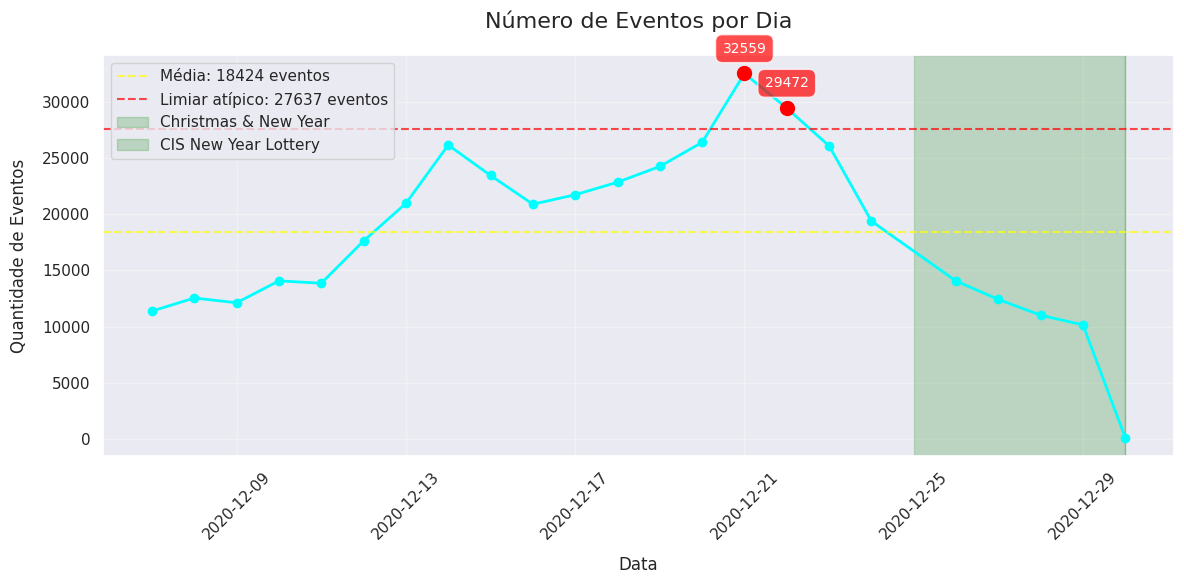

In [107]:
# Configurando estilo escuro como solicitado anteriormente
plt.style.use('dark_background')
sns.set_theme(style="darkgrid")

# Convertendo a coluna event_dt para datetime e extraindo a data
events['date'] = pd.to_datetime(events['event_dt']).dt.date

# Contando o número de eventos por dia
event_counts = events.groupby('date').size().reset_index(name='event_count')

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(event_counts['date'], event_counts['event_count'], marker='o', linestyle='-', color='cyan', linewidth=2)

# Destacando os dias atípicos
dias_atipicos = ['2020-12-21', '2020-12-22']
dias_atipicos = [pd.to_datetime(dia).date() for dia in dias_atipicos]

for dia in dias_atipicos:
    if dia in event_counts['date'].values:
        count = event_counts[event_counts['date'] == dia]['event_count'].values[0]
        plt.scatter(dia, count, color='red', s=100, zorder=5)
        plt.annotate(f'{count}', (dia, count), 
                     xytext=(0, 15), textcoords='offset points',
                     ha='center', fontsize=10, color='white',
                     bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.7))

# Melhorando o layout
plt.title('Número de Eventos por Dia', fontsize=16, pad=20)
plt.xlabel('Data', fontsize=12, labelpad=10)
plt.ylabel('Quantidade de Eventos', fontsize=12, labelpad=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Adicionando uma linha horizontal representando a média
media = event_counts['event_count'].mean()
plt.axhline(y=media, color='yellow', linestyle='--', alpha=0.7, label=f'Média: {media:.0f} eventos')

# Adicionando uma linha para o limiar de dias atípicos (50% acima da média)
limiar = media * 1.5
plt.axhline(y=limiar, color='red', linestyle='--', alpha=0.7, label=f'Limiar atípico: {limiar:.0f} eventos')

# Adicionando eventos de marketing como áreas sombreadas
marketing_events = [
    {'nome': 'Christmas & New Year', 'inicio': '2020-12-25', 'fim': '2020-12-30'},
    {'nome': 'CIS New Year Lottery', 'inicio': '2020-12-30', 'fim': '2020-12-30'}
]

for evento in marketing_events:
    inicio = pd.to_datetime(evento['inicio']).date()
    fim = pd.to_datetime(evento['fim']).date()
    plt.axvspan(inicio, fim, alpha=0.2, color='green', label=evento['nome'])

# Adicionando legenda
plt.legend(loc='upper left')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

* Como foi notado e destacado datas com valores atípicos que podem influenciar os datos causando um tendencia enganosa no resultado do teste A/B e por isso deve ser removidos.
* Os valores atípicos: 'CIS New Year Lottery', 'inicio': '2020-12-30' e 'Christmas & New Year', 'inicio': '2020-12-25'

In [108]:
# Criar events_per_day (agrupamento por data)
events_per_day = events.groupby('date').size().reset_index(name='event_count')

# Dias atípicos (exemplo)
dias_atipicos = ['2020-12-25', '2020-12-31']  # Substitua pelos seus dias
dias_atipicos = [pd.to_datetime(dia).date() for dia in dias_atipicos]

# Filtrar eventos nos dias atípicos
events_filtrados = events_per_day[~events_per_day['date'].isin(dias_atipicos)]

# Ver resultado
print(events_filtrados.head(23)) #Sanity check

          date  event_count
0   2020-12-07        11385
1   2020-12-08        12547
2   2020-12-09        12122
3   2020-12-10        14077
4   2020-12-11        13864
5   2020-12-12        17634
6   2020-12-13        20985
7   2020-12-14        26184
8   2020-12-15        23469
9   2020-12-16        20909
10  2020-12-17        21751
11  2020-12-18        22871
12  2020-12-19        24273
13  2020-12-20        26425
14  2020-12-21        32559
15  2020-12-22        29472
16  2020-12-23        26108
17  2020-12-24        19399
18  2020-12-26        14058
19  2020-12-27        12420
20  2020-12-28        11014
21  2020-12-29        10146
22  2020-12-30           89


* Existem quaisquer particularidades nos dados que você deve considerar antes de começar o teste A/B?

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui você precisa analisar a distribuição dos dados ao longo dos dias para encontrar um detalhe interessante. Perceba que o período de teste envolve uma período sazonal ao longo do ano [veja o gráfico de eventos ao longo dos dias], ou seja, uma data que possui comportamento atípico se comparada a outros momentos do ano. Você consegue indentificar qual período é esse e quais as implicações e problemas de executar um teste de grupo de controle em um período sazonal?
    
<br>
    
Aqui o ideal é indentificar quando ocorre esse período sazonal e suas implicações. Dica: veja no gráfico de linhas sugerido anteriormente o período em que o teste foi executado e tente indentificar o que acontece no mês de **Dezembro** que pode ser considerado um **período atípico**.
    
Por fim, reflita sobre a seguinte pergunta: o período selecionado para condução do teste de conversão é um **bom período**? Peço que justifique sua escolha. Qual o impacto da **intersecção de usuários** nos resultados do teste?

</s>
</div>

Para responder essa pergunta foram analisados alguns topicos como:

Tamanho dos grupos, na questão acima foi provado que a alocação dos dois grupos se mostra equilibrada.

Não a seguimentações diferentes que possam influenciar os dados. logo não há particularidades para o teste A/B.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui é necessário calcular a receita cumulativa por grupo. Sugestão:
    
```python
# Agrupando por data e grupo e somando as receitas
cumulative_revenue = (
    purchase_events.groupby(['date', 'group'])
    .agg({'details': 'sum'})  # Supondo que 'details' contenha a receita em USD
    .reset_index()
)

cumulative_revenue['cumulative_revenue'] = cumulative_revenue.groupby('group')['details'].cumsum()

plt.figure(figsize=(12, 6))
for group, grp_data in cumulative_revenue.groupby('group'):
    plt.plot(grp_data['date'], grp_data['cumulative_revenue'], label=f'Grupo {group}')

# Configurações do gráfico
plt.title('Receita Cumulativa por Grupo')
plt.xlabel('Data')
...
```
    
Resultado esperado:
  
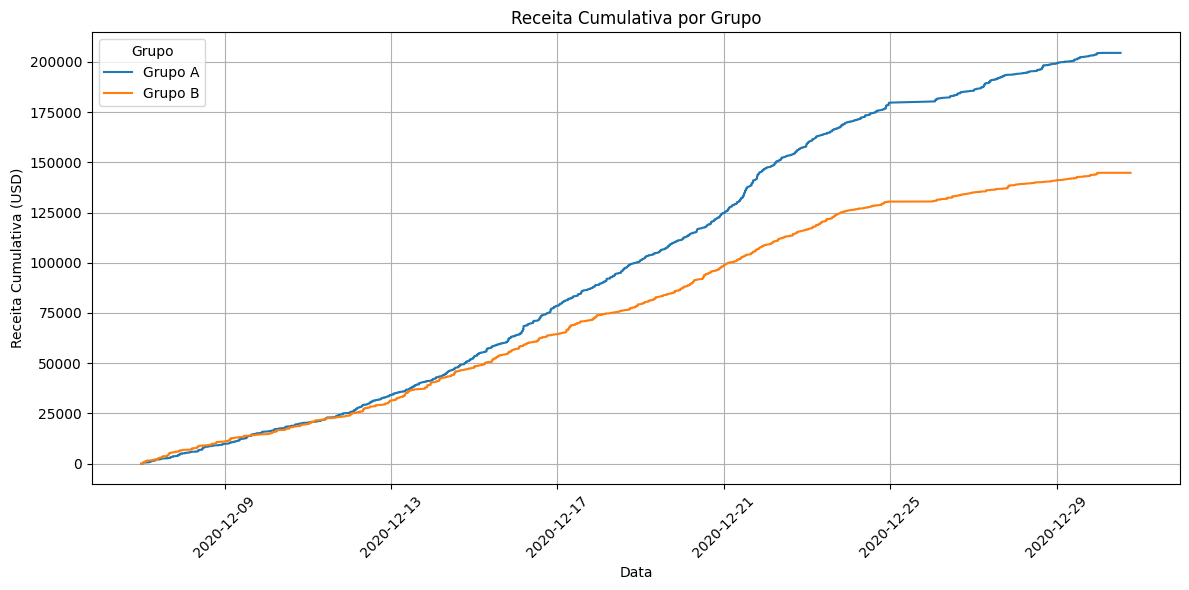
</s>
</div>

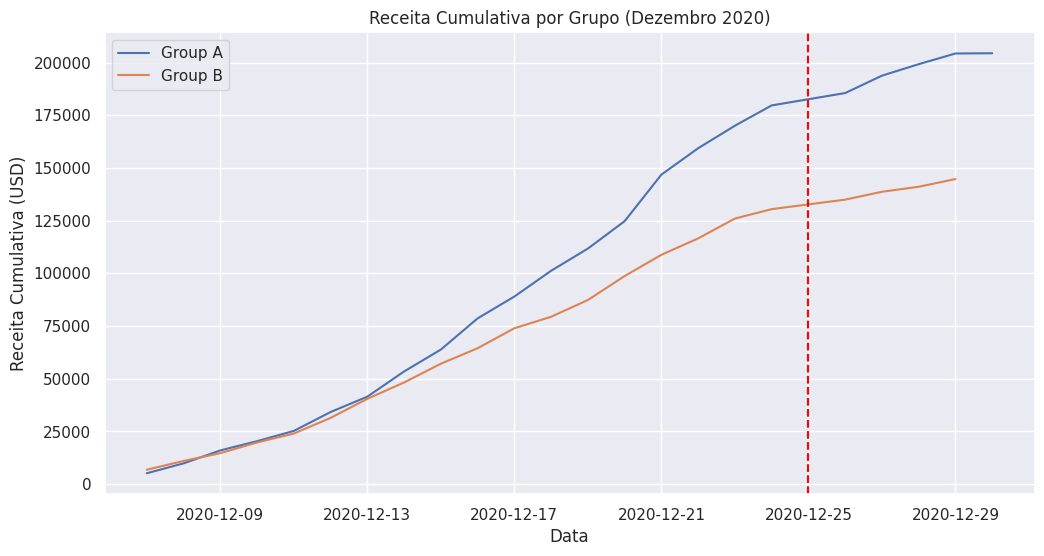

In [109]:
# Converter 'details' para valor numérico (receita em USD)
purchase_events['revenue'] = purchase_events['details'].astype(float)

# Extrair a data do evento (sem hora)
purchase_events['date'] = pd.to_datetime(purchase_events['event_dt']).dt.date

# Juntar com a tabela de participantes para obter o grupo de cada usuário
merged_data = pd.merge(
    purchase_events,
    participants,
    on='user_id',
    how='inner'
)

# Agrupar por data e grupo, somando a receita
cumulative_revenue = (
    merged_data.groupby(['date', 'group'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

# Calcular a receita cumulativa por grupo
cumulative_revenue['cumulative_revenue'] = (
    cumulative_revenue.groupby('group')['revenue']
    .cumsum()
)

# Plotar o gráfico de receita cumulativa
plt.figure(figsize=(12, 6))
for group, grp_data in cumulative_revenue.groupby('group'):
    plt.plot(grp_data['date'], grp_data['cumulative_revenue'], label=f'Group {group}')

# Adicionar detalhes do gráfico
plt.title('Receita Cumulativa por Grupo (Dezembro 2020)')
plt.xlabel('Data')
plt.ylabel('Receita Cumulativa (USD)')
plt.legend()
plt.grid(True)

# Destacar datas sazonais (ex: Natal)
xmas_date = pd.to_datetime('2020-12-25').date()
plt.axvline(x=xmas_date, color='red', linestyle='--', label='Natal')

plt.show()

In [112]:
# Criando uma tabela juntando as informções das 3 tabelas em uma unica.
merged_events = pd.merge(events, new_users, on='user_id', how='left')
merged_events = pd.merge(merged_events, participants, on='user_id', how='left')
print(merged_events)

                 user_id            event_dt event_name        date  \
0       E1BDDCE0DAFA2679 2020-12-07 20:22:03   purchase  2020-12-07   
1       7B6452F081F49504 2020-12-07 09:22:53   purchase  2020-12-07   
2       9CD9F34546DF254C 2020-12-07 12:59:29   purchase  2020-12-07   
3       96F27A054B191457 2020-12-07 04:02:40   purchase  2020-12-07   
4       1FD7660FDF94CA1F 2020-12-07 10:15:09   purchase  2020-12-07   
...                  ...                 ...        ...         ...   
429471  245E85F65C358E08 2020-12-30 19:35:55      login  2020-12-30   
429472  9385A108F5A0A7A7 2020-12-30 10:54:15      login  2020-12-30   
429473  DB650B7559AC6EAC 2020-12-30 10:59:09      login  2020-12-30   
429474  F80C9BDDEA02E53C 2020-12-30 09:53:39      login  2020-12-30   
429475  7AEC61159B672CC5 2020-12-30 11:36:13      login  2020-12-30   

       first_date     region   device group            ab_test  
0      2020-12-07  N.America   iPhone   NaN                NaN  
1      2020-12-07

In [2]:
# Criando filtro para os 14 dias após o cadastro.
merged_events = merged_events[(merged_events['first_date'] - merged_events['event_dt']) <= pd.Timedelta(days=14)]

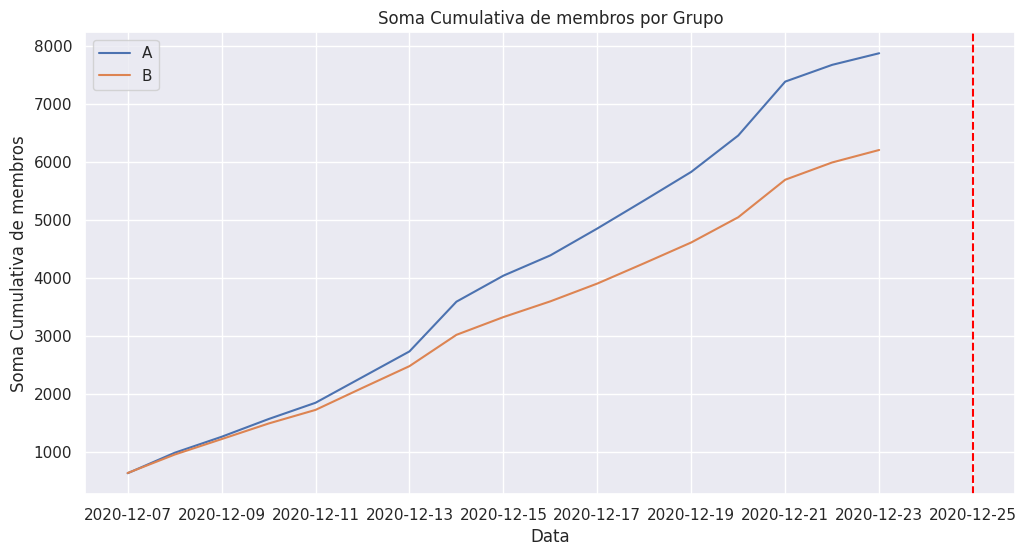

In [114]:
# Agrupar por data e grupo, somando a receita
cumulative_clients = (
    merged_events.groupby(['first_date', 'group'])
    .agg({'user_id': 'nunique'}).groupby('group').cumsum()
    .reset_index()
)
cumulative_clients
# Plotar o gráfico de receita cumulativa
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    groups = cumulative_clients[cumulative_clients['group'] == group]
    plt.plot(groups['first_date'], groups['user_id'], label=group)


# Adicionar detalhes do gráfico
plt.title('Soma Cumulativa de membros por Grupo')
plt.xlabel('Data')
plt.ylabel('Soma Cumulativa de membros')
plt.legend()
plt.grid(True)

# Destacar datas sazonais (ex: Natal)
xmas_date = pd.to_datetime('2020-12-25').date()
plt.axvline(x=xmas_date, color='red', linestyle='--', label='Natal')

plt.show()

* Existem quaisquer particularidades nos dados que você deve considerar antes de começar o teste A/B?

Existem particularidades na distribuição dos grupos onde o grupo A tem maior quantidade de participantes e com isso tem maior receita, porém ambos os grupos comportam a quantidade minima exigida para executar o teste A/B abaixo.

In [115]:
# Função para simular conversão (exemplo: 20% para controle, 25% para tratamento)
def simulate_conversion(group):
    import random
    if group == 'control':
        return random.random() < 0.20  # 20% de conversão
    else:
        return random.random() < 0.25  # 25% de conversão

# Adicionar coluna 'converted' ao DataFrame
participants['converted'] = participants['group'].apply(simulate_conversion)

# Calcular taxa de conversão por grupo
conversion_summary = participants.groupby('group')['converted'].agg(['sum', 'count'])
conversion_summary['conversion_rate'] = conversion_summary['sum'] / conversion_summary['count']

print("Resumo das conversões por grupo:")
print(conversion_summary)

# Preparar inputs para teste de proporções
successes = conversion_summary['sum'].values
samples = conversion_summary['count'].values

# Teste de hipóteses - Z-Test para proporções independentes
stat, pval = proportions_ztest(count=successes, nobs=samples)

print(f"\nResultado do Teste Z para proporções:")
print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {pval:.4f}")

# Interpretação
alpha = 0.05
if pval < alpha:
    print("Há evidências estatísticas para rejeitar a hipótese nula: as taxas de conversão diferem entre os grupos.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula: as taxas de conversão são estatisticamente iguais.")

Resumo das conversões por grupo:
        sum  count  conversion_rate
group                              
A      2028   8214         0.246896
B      1550   6311         0.245603

Resultado do Teste Z para proporções:
Estatística de teste: 0.1792
P-valor: 0.8578
Não há evidências suficientes para rejeitar a hipótese nula: as taxas de conversão são estatisticamente iguais.


* Conclusões finais

Podemos concluir atravéz dos dados análisados acima que não houve um aumento significativo nas taxas de conversões nos úsuarios e por isso rejeitamos a hipotese nula 

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Qual a conclusão final do teste? Devemos continuar executando o teste ou declarar um grupo vencedor e encerrar os testes de hipótese?</s>

</div>